In [1]:
from bs4 import BeautifulSoup as bs
import requests
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
import numpy as np
import pandas as pd

In [2]:
link = 'https://news.google.com/news/rss'

In [3]:
page = requests.get(link)

In [4]:
page

<Response [200]>

In [5]:
page.content

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><rss version="2.0" xmlns:media="http://search.yahoo.com/mrss/"><channel><generator>NFE/5.0</generator><title>Top stories - Google News</title><link>https://news.google.com/?hl=en-IN&amp;gl=IN&amp;ceid=IN:en</link><language>en-IN</language><webMaster>news-webmaster@google.com</webMaster><copyright>2021 Google Inc.</copyright><lastBuildDate>Mon, 19 Jul 2021 12:05:33 GMT</lastBuildDate><description>Google News</description><item><title>Prashant Kishor Hacked by Pegasus, Mamata\xe2\x80\x99s Nephew Also Selected as Potential Snoop Target - The Wire</title><link>https://news.google.com/__i/rss/rd/articles/CBMiVGh0dHBzOi8vdGhld2lyZS5pbi9nb3Zlcm5tZW50L3ByYXNoYW50LWtpc2hvci1tYW1hdGEtYmFuZXJqZWUtbmVwaGV3LXBlZ2FzdXMtc3B5d2FyZdIBYmh0dHBzOi8vbS50aGV3aXJlLmluL2FydGljbGUvZ292ZXJubWVudC9wcmFzaGFudC1raXNob3ItbWFtYXRhLWJhbmVyamVlLW5lcGhldy1wZWdhc3VzLXNweXdhcmUvYW1w?oc=5</link><guid isPermaLink="false">52781738329534</guid><pubDate>Mon, 19 Jul 2021

In [6]:
soup = bs(page.content,'html.parser')

In [7]:
news = soup.find_all('title',)
news

[<title>Top stories - Google News</title>,
 <title>Prashant Kishor Hacked by Pegasus, Mamata’s Nephew Also Selected as Potential Snoop Target - The Wire</title>,
 <title>‘Ask sharpest questions but allow Govt to respond’: PM Modi tells Opposition ahead of Parliament Monsoon Session - The Indian Express</title>,
 <title>Mumbai Rains News LIVE Updates: Mumbai rains to continue, record July rains expected - Moneycontrol.com</title>,
 <title>Coronavirus update: India adds 38,164 new COVID-19 cases, 499 deaths - Moneycontrol</title>,
 <title>Rahul Gandhi, Prashant Kishor, 2 Union Ministers Among Pegasus 'Targets' - NDTV</title>,
 <title>Navjot Sidhu says his journey has just begun, thanks Gandhis for naming him Punjab Congress chief - The Indian Express</title>,
 <title>Bombay HC: For how many years will people languish in jail without trial - The Hindu</title>,
 <title>UP makes negative RT-PCR mandatory for those visiting from these states - Hindustan Times</title>,
 <title>CBSE Board clas

In [8]:
statement = []
for i in range(0,len(news)):
    statement.append(news[i].get_text())

In [9]:
statement.pop(0)

'Top stories - Google News'

In [10]:
import pandas as pd
df = pd.DataFrame()

In [11]:
df['x'] = statement

In [12]:
df.head()

,x
0,"Prashant Kishor Hacked by Pegasus, Mamata’s Ne..."
1,‘Ask sharpest questions but allow Govt to resp...
2,Mumbai Rains News LIVE Updates: Mumbai rains t...
3,"Coronavirus update: India adds 38,164 new COVI..."
4,"Rahul Gandhi, Prashant Kishor, 2 Union Ministe..."


In [13]:
data = df.x.values.tolist()
data

['Prashant Kishor Hacked by Pegasus, Mamata’s Nephew Also Selected as Potential Snoop Target - The Wire',
 '‘Ask sharpest questions but allow Govt to respond’: PM Modi tells Opposition ahead of Parliament Monsoon Session - The Indian Express',
 'Mumbai Rains News LIVE Updates: Mumbai rains to continue, record July rains expected - Moneycontrol.com',
 'Coronavirus update: India adds 38,164 new COVID-19 cases, 499 deaths - Moneycontrol',
 "Rahul Gandhi, Prashant Kishor, 2 Union Ministers Among Pegasus 'Targets' - NDTV",
 'Navjot Sidhu says his journey has just begun, thanks Gandhis for naming him Punjab Congress chief - The Indian Express',
 'Bombay HC: For how many years will people languish in jail without trial - The Hindu',
 'UP makes negative RT-PCR mandatory for those visiting from these states - Hindustan Times',
 'CBSE Board class 10th result 2021 soon, to be hosted on multiple platforms - Hindustan Times',
 'TNDGE HSE +2 Class 12th Result 2021 released: Websites to check score -

# Data Cleaning

In [14]:
import re
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

In [15]:
data = pd.Series(data)

In [16]:
# lets do some preprocessing and move on 
# here we are going to use regex for data cleaning
import re
data_processed = data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0     prashant kishor hacked by pegasus mamata s nep...
1      ask sharpest questions but allow govt to resp...
2     mumbai rains news live updates mumbai rains to...
3     coronavirus update india adds new covid cases ...
4     rahul gandhi prashant kishor union ministers a...
5     navjot sidhu says his journey has just begun t...
6     bombay hc for how many years will people langu...
7     up makes negative rt pcr mandatory for those v...
8     cbse board class th result soon to be hosted o...
9     tndge hse class th result released websites to...
10    bus crashes in pakistan killing people and inj...
11    pakistan urges afghanistan to reconsider recal...
12     pingdemic chaos mars boris johnson s big day ...
13    in afghanistan indian interests face a descent...
14    sensex dives points as banking financial share...
15    clean science and technology gets green signal...
16    sebi investigating some adani companies says m...
17    govt s excise collections on petrol diesel

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# now lets deal with stopwords 
# using nltk stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["the", "india", "times", "hindustan times", "indian express", "hindustan", "indian",'gsmarenacom', "express", "ndtv",'news18','news','DNA India','moneycontrol','news18','gsmarena','com'])
len(stop_words)

196

In [19]:
from nltk import word_tokenize

In [20]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)> 2]))

In [21]:
data_final[0:2]

0    prashant kishor hacked pegasus mamata nephew a...
1    ask sharpest questions allow govt respond modi...
dtype: object

# EDA

In [22]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
#freq_dist.keys()

[('covid', 5),
 ('shares', 4),
 ('rains', 3),
 ('people', 3),
 ('prashant', 2),
 ('kishor', 2),
 ('pegasus', 2),
 ('govt', 2),
 ('mumbai', 2),
 ('new', 2),
 ('rahul', 2),
 ('says', 2),
 ('years', 2),
 ('makes', 2),
 ('class', 2),
 ('result', 2),
 ('pakistan', 2),
 ('afghanistan', 2),
 ('chaos', 2),
 ('big', 2)]

In [23]:
words_list

['prashant',
 'kishor',
 'hacked',
 'pegasus',
 'mamata',
 'nephew',
 'also',
 'selected',
 'potential',
 'snoop',
 'target',
 'wire',
 'ask',
 'sharpest',
 'questions',
 'allow',
 'govt',
 'respond',
 'modi',
 'tells',
 'opposition',
 'ahead',
 'parliament',
 'monsoon',
 'session',
 'mumbai',
 'rains',
 'live',
 'updates',
 'mumbai',
 'rains',
 'continue',
 'record',
 'july',
 'rains',
 'expected',
 'coronavirus',
 'update',
 'adds',
 'new',
 'covid',
 'cases',
 'deaths',
 'rahul',
 'gandhi',
 'prashant',
 'kishor',
 'union',
 'ministers',
 'among',
 'pegasus',
 'targets',
 'navjot',
 'sidhu',
 'says',
 'journey',
 'begun',
 'thanks',
 'gandhis',
 'naming',
 'punjab',
 'congress',
 'chief',
 'bombay',
 'many',
 'years',
 'people',
 'languish',
 'jail',
 'without',
 'trial',
 'hindu',
 'makes',
 'negative',
 'pcr',
 'mandatory',
 'visiting',
 'states',
 'cbse',
 'board',
 'class',
 'result',
 'soon',
 'hosted',
 'multiple',
 'platforms',
 'tndge',
 'hse',
 'class',
 'result',
 'release

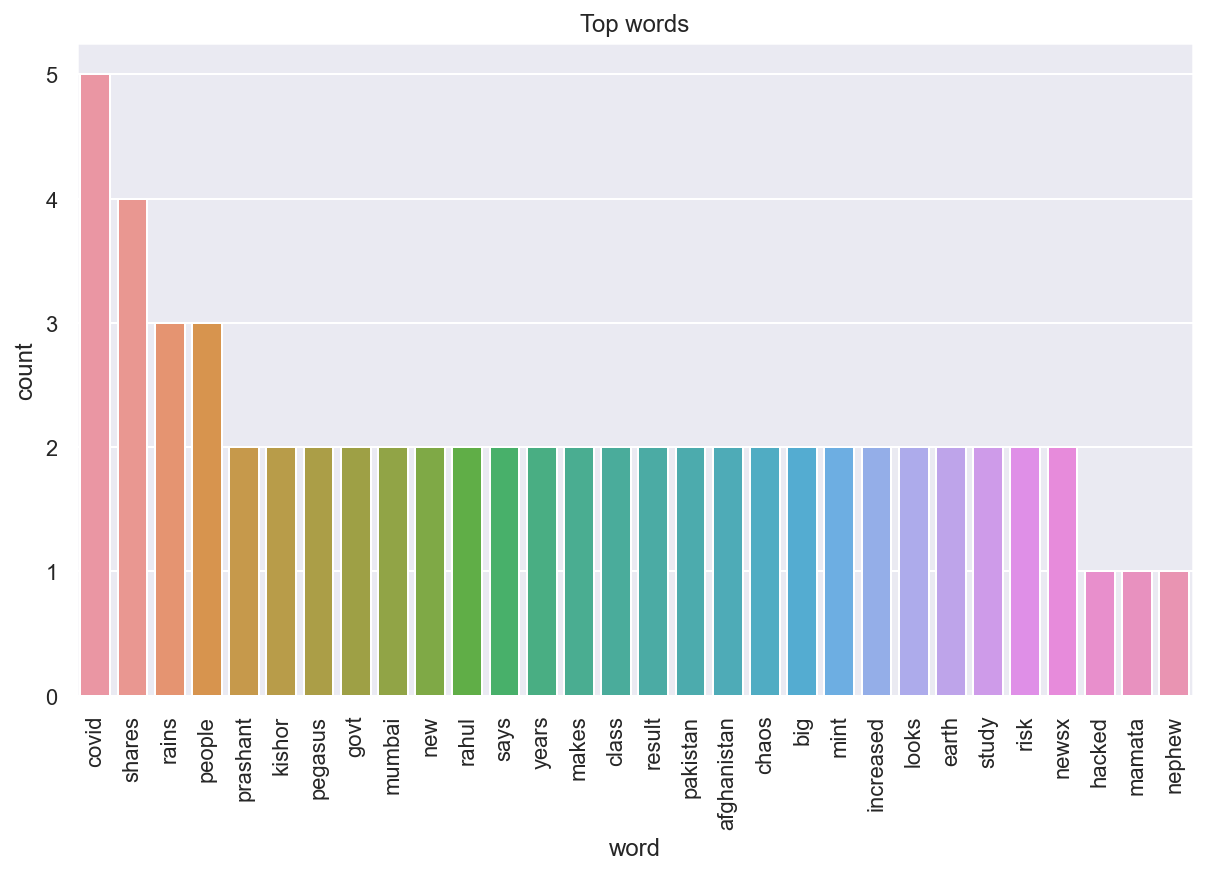

In [24]:
# creating a temporary dataframe and plotting the graph
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

In [26]:
!pip install WordCloud

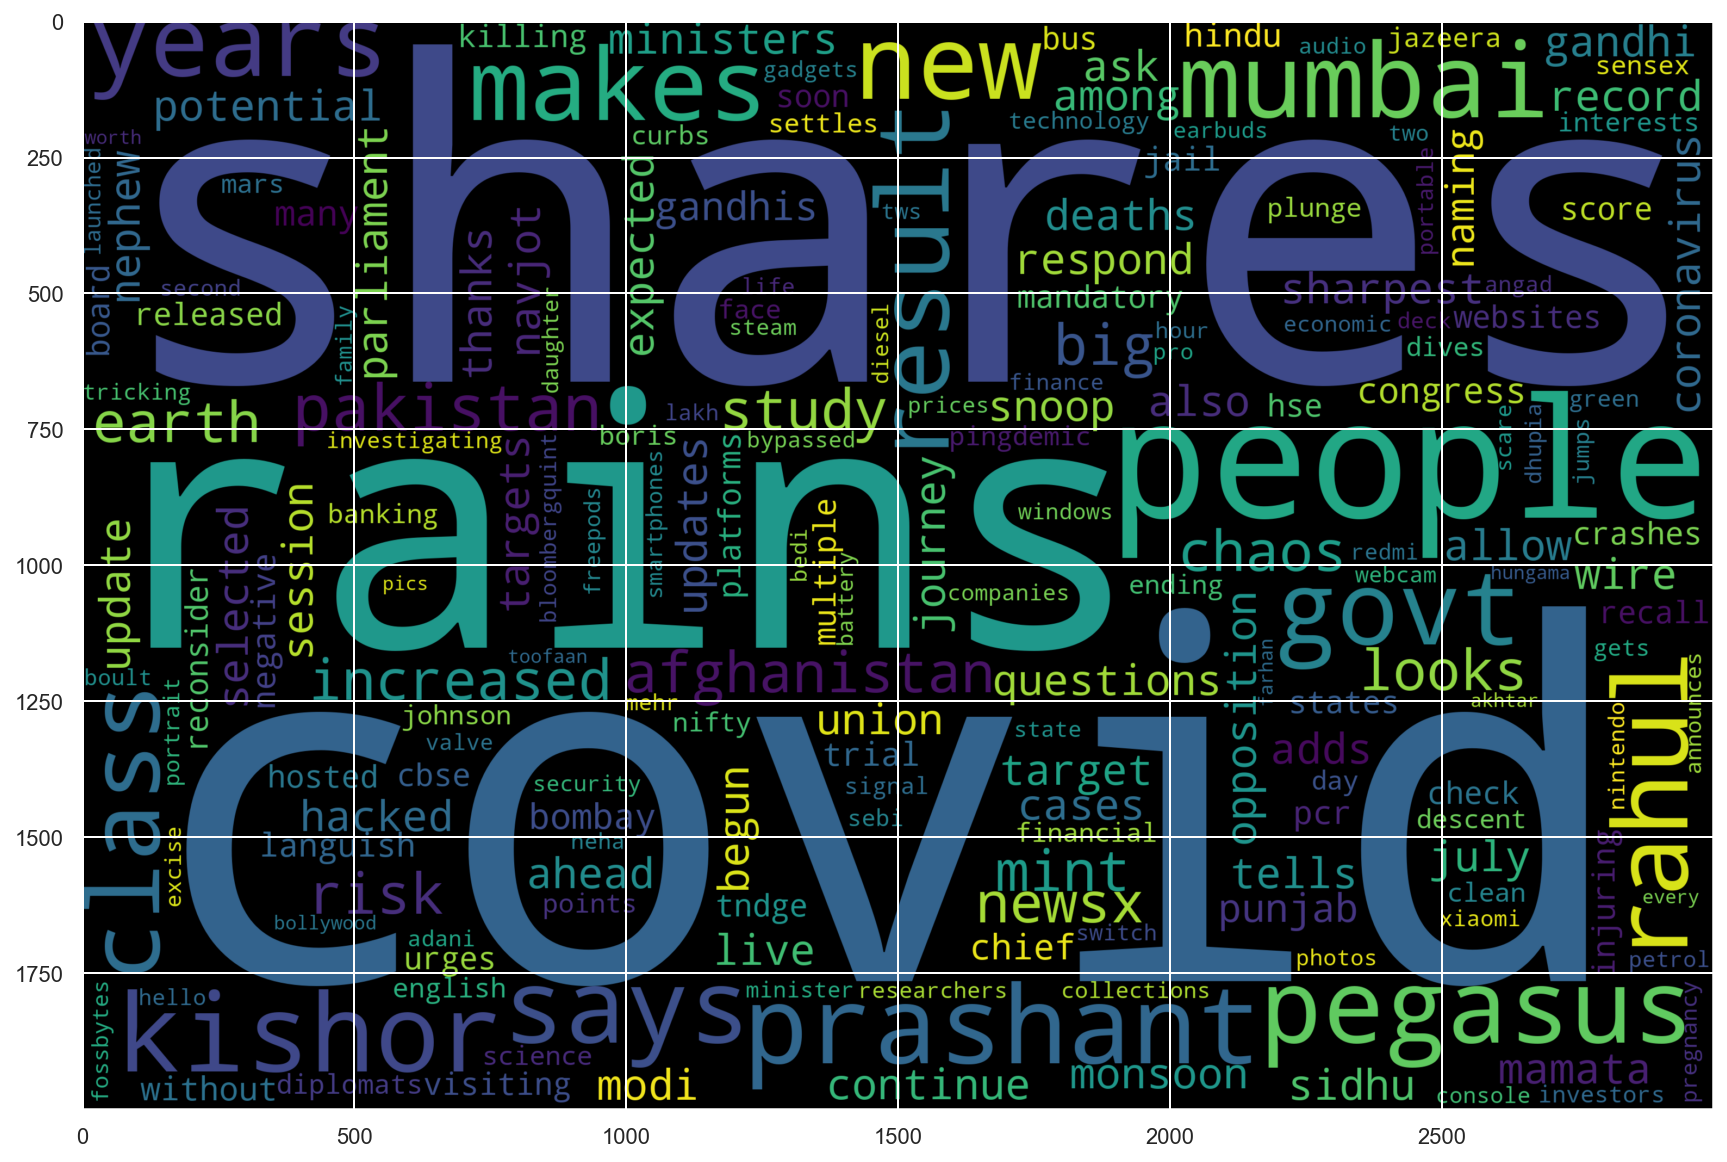

In [25]:
%config InlineBackend.figure_format = 'retina'

from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=3000, height=2000).generate_from_frequencies(freq_dist)
#plotting the wordcloud
plt.figure(figsize=(16,10), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

# lets create a Bigram and trigram for more sense

1-Bigrams are two words frequently occurring together in the document. 

2-Trigrams are 3 words frequently occurring.

--Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams.

In [29]:
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23


In [26]:
#loading libraries 
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

C:\Users\admin\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [27]:
words_sent = [x.split() for x in data_final]
words_sent
bigram = Phrases(words_sent, min_count=3, threshold=100)
trigram = Phrases(bigram[words_sent], threshold=100)  

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# bow = [bigram_phraser[word] for word in words_sent] # creating bigram
bow = [trigram_phraser[bigram_phraser[words]] for words in words_sent] # creating trigram and bigram,it give a more efficency to model

In [28]:
words_sent

[['prashant',
  'kishor',
  'hacked',
  'pegasus',
  'mamata',
  'nephew',
  'also',
  'selected',
  'potential',
  'snoop',
  'target',
  'wire'],
 ['ask',
  'sharpest',
  'questions',
  'allow',
  'govt',
  'respond',
  'modi',
  'tells',
  'opposition',
  'ahead',
  'parliament',
  'monsoon',
  'session'],
 ['mumbai',
  'rains',
  'live',
  'updates',
  'mumbai',
  'rains',
  'continue',
  'record',
  'july',
  'rains',
  'expected'],
 ['coronavirus', 'update', 'adds', 'new', 'covid', 'cases', 'deaths'],
 ['rahul',
  'gandhi',
  'prashant',
  'kishor',
  'union',
  'ministers',
  'among',
  'pegasus',
  'targets'],
 ['navjot',
  'sidhu',
  'says',
  'journey',
  'begun',
  'thanks',
  'gandhis',
  'naming',
  'punjab',
  'congress',
  'chief'],
 ['bombay',
  'many',
  'years',
  'people',
  'languish',
  'jail',
  'without',
  'trial',
  'hindu'],
 ['makes', 'negative', 'pcr', 'mandatory', 'visiting', 'states'],
 ['cbse',
  'board',
  'class',
  'result',
  'soon',
  'hosted',
  'mu

In [29]:
bow[0:10]

[['prashant',
  'kishor',
  'hacked',
  'pegasus',
  'mamata',
  'nephew',
  'also',
  'selected',
  'potential',
  'snoop',
  'target',
  'wire'],
 ['ask',
  'sharpest',
  'questions',
  'allow',
  'govt',
  'respond',
  'modi',
  'tells',
  'opposition',
  'ahead',
  'parliament',
  'monsoon',
  'session'],
 ['mumbai',
  'rains',
  'live',
  'updates',
  'mumbai',
  'rains',
  'continue',
  'record',
  'july',
  'rains',
  'expected'],
 ['coronavirus', 'update', 'adds', 'new', 'covid', 'cases', 'deaths'],
 ['rahul',
  'gandhi',
  'prashant',
  'kishor',
  'union',
  'ministers',
  'among',
  'pegasus',
  'targets'],
 ['navjot',
  'sidhu',
  'says',
  'journey',
  'begun',
  'thanks',
  'gandhis',
  'naming',
  'punjab',
  'congress',
  'chief'],
 ['bombay',
  'many',
  'years',
  'people',
  'languish',
  'jail',
  'without',
  'trial',
  'hindu'],
 ['makes', 'negative', 'pcr', 'mandatory', 'visiting', 'states'],
 ['cbse',
  'board',
  'class',
  'result',
  'soon',
  'hosted',
  'mu

In [30]:
!pip install spacy

In [38]:
!pip install en

  Created wheel for en: filename=en-0.0.1-py3-none-any.whl size=1151 sha256=df131655e9542817012f97ff7a4d6f1416a71c8238a585f916f7203dd27b39ea
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\de\60\29\dd935b7613b59558342edabe88c2c644025417901252423efc
Successfully built en


In [31]:
### lemmatisation by using spacy and pos tagging
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # disabing the parse and ner from pipeline it increase speed of pipeline

# here 'en' in spacy pipeline means the small version of language
#ner-name entity recognization

In [32]:
doc = nlp(' '.join(bow[2]))
for token in doc:
    print(token ,'=>', token.pos_)

mumbai => PROPN
rains => NOUN
live => ADV
updates => VERB
mumbai => NOUN
rains => NOUN
continue => VERB
record => NOUN
july => PROPN
rains => NOUN
expected => VERB


In [33]:
# now lemmatising the whole corpus so that we can reach to the root words 
def lemmatization(texts, tags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']): # filter noun and adjective(for topic modelling we need only this filter)
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [34]:
# now lemmatising the whole corpus so that we can reach to the root words 
def lemmatization(texts, tags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']): # filter noun and adjective
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [35]:
bag_of_words = lemmatization(bow)
bag_of_words #here we have only this pos[''NOUN', 'ADJ', 'VERB', 'ADV','PROPN'']

[['prashant',
  'kishor',
  'hack',
  'pegasus',
  'mamata',
  'nephew',
  'also',
  'select',
  'potential',
  'snoop',
  'target',
  'wire'],
 ['ask',
  'sharp',
  'question',
  'allow',
  'govt',
  'respond',
  'modi',
  'tell',
  'opposition',
  'ahead',
  'parliament',
  'monsoon',
  'session'],
 ['mumbai',
  'rain',
  'live',
  'update',
  'mumbai',
  'rain',
  'continue',
  'record',
  'july',
  'rain',
  'expect'],
 ['coronavirus', 'update', 'add', 'new', 'covid', 'case', 'death'],
 ['rahul',
  'gandhi',
  'prashant',
  'kishor',
  'union',
  'minister',
  'pegasus',
  'target'],
 ['navjot',
  'sidhu',
  'say',
  'journey',
  'begin',
  'thank',
  'gandhis',
  'name',
  'punjab',
  'congress',
  'chief'],
 ['bombay', 'many', 'year', 'people', 'languish', 'jail', 'trial', 'hindu'],
 ['make', 'negative', 'pcr', 'mandatory', 'visit', 'state'],
 ['cbse', 'board', 'class', 'result', 'soon', 'host', 'multiple', 'platform'],
 ['tndge', 'hse', 'class', 'result', 'release', 'website', '

# Now we need to encode the whole corpus into some numbers

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.



In [36]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)
# here keys are some numbers and values are our words
#it provided id to all words

Dictionary(302 unique tokens: ['also', 'hack', 'kishor', 'mamata', 'nephew']...)


In [37]:
#  now lets create a encoded bag of words 
corpus_matrix = [id2word.doc2bow(sent) for sent in bag_of_words]
#  here we created corpus and it shown occurence of word id


In [38]:
corpus_matrix[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1)]

In [39]:
### Now create our model by using gensim lda

In [42]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=10, 
                                    random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)
lda_model.save('gensim_model.gensim')

In [50]:
lda_model.print_topics()
# doc_lda = lda_model[corpus_matrix]
#it shown a probability distribution

[(0,
  '0.026*"check" + 0.026*"battle" + 0.026*"claim" + 0.026*"shroud" + 0.026*"royale" + 0.026*"do" + 0.026*"tech" + 0.026*"game" + 0.026*"pubg" + 0.026*"sensational"'),
 (1,
  '0.036*"jazeera" + 0.036*"english" + 0.019*"gizchina" + 0.019*"interview" + 0.019*"new" + 0.019*"realme" + 0.019*"covid" + 0.019*"pad" + 0.019*"patient" + 0.019*"stylus"'),
 (2,
  '0.015*"look" + 0.015*"ease" + 0.015*"college" + 0.015*"online" + 0.015*"diet" + 0.015*"iss" + 0.015*"sale" + 0.015*"allow" + 0.015*"amazon" + 0.015*"booking"'),
 (3,
  '0.019*"say" + 0.019*"space" + 0.019*"kiss" + 0.019*"khan" + 0.019*"arora" + 0.019*"adorable" + 0.019*"find" + 0.019*"united" + 0.019*"kareena" + 0.019*"amrita"'),
 (4,
  '0.017*"team" + 0.017*"navjot" + 0.017*"elevation" + 0.017*"ahead" + 0.017*"new" + 0.017*"hindu" + 0.017*"assemble" + 0.017*"break" + 0.017*"spoil" + 0.017*"mastercard"'),
 (5,
  '0.021*"british" + 0.021*"hindu" + 0.021*"recent" + 0.021*"odi" + 0.021*"spear" + 0.021*"say" + 0.021*"father" + 0.021*"co

In [43]:
#lda_model.print_topics()
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.025*"share" + 0.013*"bedi" + 0.013*"announce" + 0.013*"bollywood" + 0.013*"portrait" + 0.013*"mehr" + 0.013*"ayushmann" + 0.013*"daughter" + 0.013*"pregnancy" + 0.013*"minister"


Topic: 1 
Words: 0.030*"pakistan" + 0.030*"crash" + 0.030*"kill" + 0.030*"people" + 0.030*"bus" + 0.030*"injure" + 0.003*"smoke" + 0.003*"link" + 0.003*"ani" + 0.003*"risk"


Topic: 2 
Words: 0.035*"rain" + 0.024*"mumbai" + 0.024*"class" + 0.024*"govt" + 0.024*"result" + 0.012*"update" + 0.012*"monsoon" + 0.012*"tell" + 0.012*"session" + 0.012*"opposition"


Topic: 3 
Words: 0.036*"newsx" + 0.019*"launch" + 0.019*"trial" + 0.019*"virus" + 0.019*"china" + 0.019*"monkey" + 0.019*"base" + 0.019*"tws" + 0.019*"beijing" + 0.019*"vet"


Topic: 4 
Words: 0.020*"hack" + 0.020*"snoop" + 0.020*"potential" + 0.020*"target" + 0.020*"pegasus" + 0.020*"new" + 0.020*"bang" + 0.020*"prashant" + 0.020*"wire" + 0.020*"also"


Topic: 5 
Words: 0.019*"planet" + 0.019*"earth" + 0.019*"embrace" + 0.019*"study" +

# Visualisation of topic modelling

In [51]:
#import pyLDAvis.gensim_models as gensimvis

In [56]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)


In [57]:
import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.102239  0.160344       1        1  19.775429
6      0.165945  0.022447       2        1  16.056103
2     -0.063880 -0.136540       3        1  12.497130
4     -0.053556  0.003121       4        1   9.592729
8      0.077483  0.038674       5        1   9.475124
1      0.004593 -0.036732       6        1   8.540158
3     -0.043423 -0.032143       7        1   8.263259
5      0.006900 -0.001219       8        1   6.506436
9      0.013127 -0.010551       9        1   5.459048
0     -0.004951 -0.007402      10        1   3.834582, topic_info=        Term      Freq     Total Category  logprob  loglift
5       rain  2.000000  2.000000  Default  30.0000  30.0000
3     mumbai  2.000000  2.000000  Default  29.0000  29.0000
1      heavy  3.000000  3.000000  Default  28.0000  28.0000
87     covid  3.000000  3.000000  Default  27.0000  27.0000
104  jazeera  1.000000  1.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
238     nasa  0.031391  2.264449  Topic10  -6.0379  -1.0175
17    leader  0.031391  1.866498  Topic10  -6.0379  -0.8242
77    report  0.031391  1.578865  Topic10  -6.0379  -0.6568
91      test  0.031391  1.578864  Topic10  -6.0379  -0.6568
18      list  0.031391  1.829758  Topic10  -6.0379  -0.8043

[391 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
288       7  1.004459       abp
199       4  0.970078  activism
189       7  1.004458  adorable
22        4  0.970077     ahead
265       7  1.004458       air
...     ...       ...       ...
123       2  0.597651      week
123       5  0.597651      week
203       4  0.970077       win
59        4  0.970078     wrong
140       1  0.841297    zomato

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 3, 5, 9, 2, 4, 6, 10, 1])

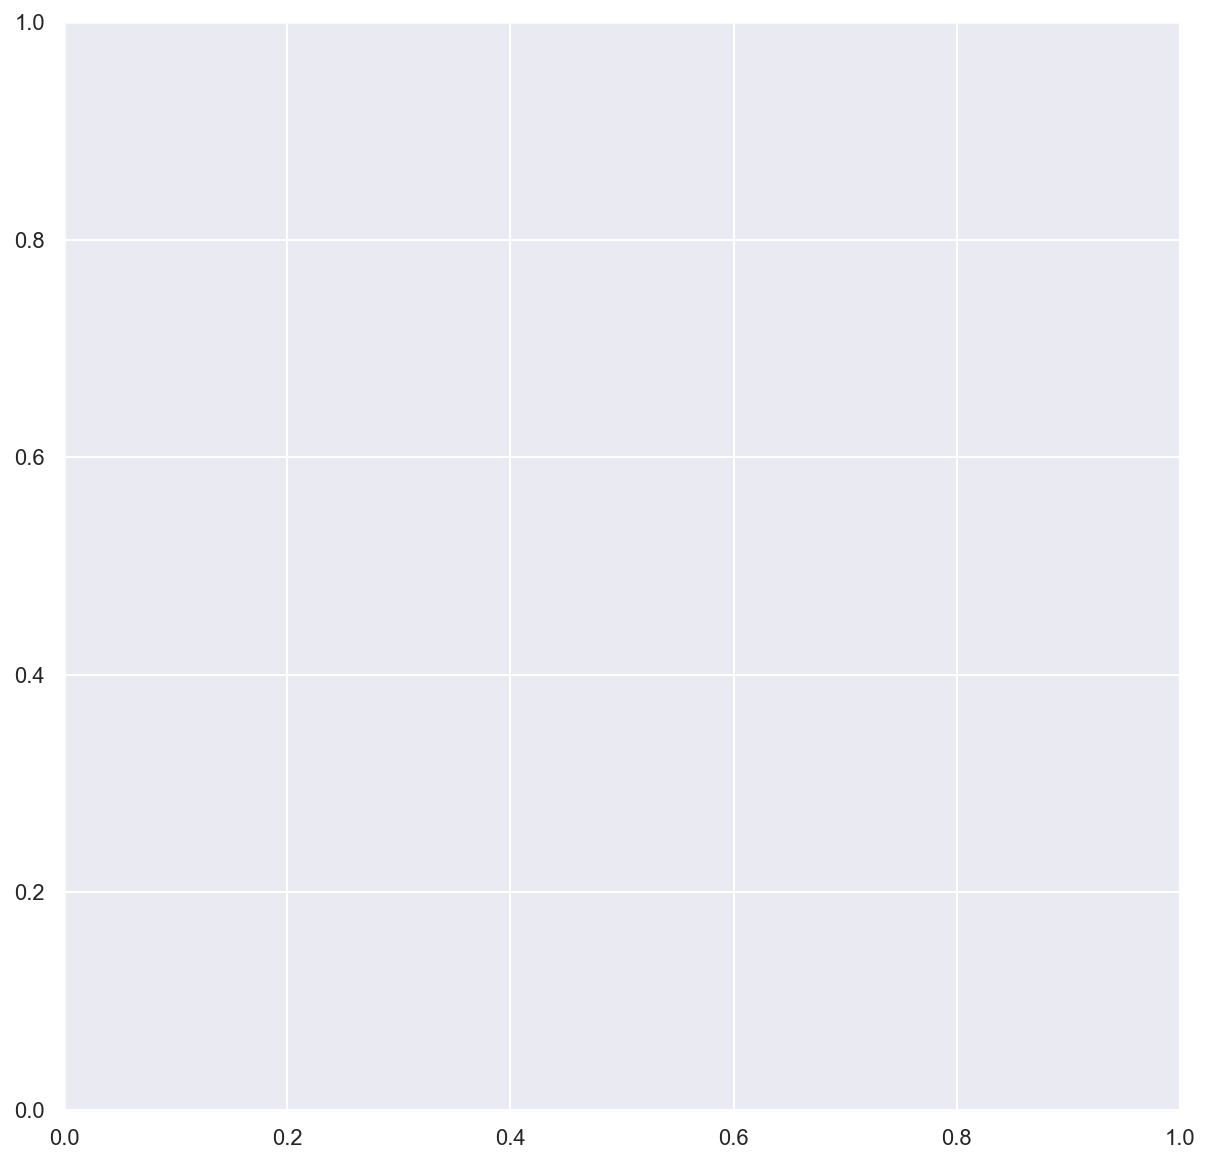

In [58]:

# Visualize the topics

# Visualize the topics
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus = corpus_matrix, dictionary = id2word)
vis

# Evaluation

### Compute Model Perplexity and Coherence Score¶

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 

In [59]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))  
##### a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() 
print('\nCoherence Score: ', coherence_lda)
### a measure of how good the model is. heigher the better

C:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.4893116295859

Coherence Score:  0.3576017655540826


# Finding the number of topics
Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [60]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_matrix, texts=bag_of_words, start=18, limit=40, step=6)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


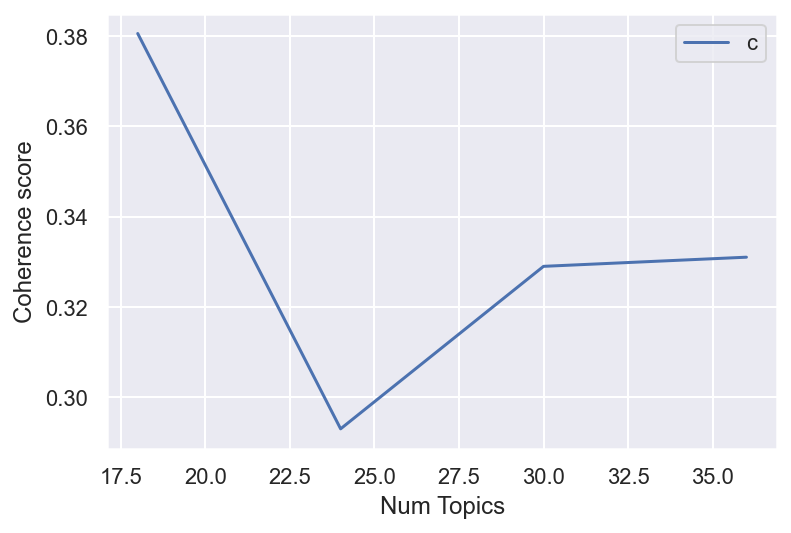

In [62]:
# Show graph
limit=40; start=18; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#in figure,it is better to select 30 topic :

In [44]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=30, 
                                    random_state=100,
                                           update_every=1,
                                           chunksize=200,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [45]:
#lda_model.print_topics()
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.033*"gupta" + 0.033*"ayushmann" + 0.033*"first" + 0.033*"uday" + 0.033*"look" + 0.033*"khurrana" + 0.033*"movie" + 0.033*"prevent" + 0.033*"injure" + 0.033*"increase"


Topic: 1 
Words: 0.003*"kriti" + 0.003*"finally" + 0.003*"cricket" + 0.003*"brand" + 0.003*"sanon" + 0.003*"prove" + 0.003*"promotional" + 0.003*"mimi" + 0.003*"ind" + 0.003*"uday"


Topic: 2 
Words: 0.043*"trial" + 0.043*"many" + 0.043*"languish" + 0.043*"face" + 0.043*"jail" + 0.043*"bombay" + 0.043*"year" + 0.043*"mint" + 0.043*"interest" + 0.043*"afghanistan"


Topic: 3 
Words: 0.101*"newsx" + 0.051*"virus" + 0.051*"beijing" + 0.051*"china" + 0.051*"die" + 0.051*"monkey" + 0.051*"vet" + 0.051*"base" + 0.051*"report" + 0.002*"look"


Topic: 4 
Words: 0.047*"also" + 0.047*"potential" + 0.047*"hack" + 0.047*"target" + 0.047*"wire" + 0.047*"pegasus" + 0.047*"prashant" + 0.047*"kishor" + 0.047*"snoop" + 0.047*"select"


Topic: 5 
Words: 0.003*"kriti" + 0.003*"finally" + 0.003*"cricket" + 0.003*"brand" 

In [65]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.794774392777212

Coherence Score:  0.31700755017682425


In [2]:
import spacy
import nlp